In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.insert(6,'new'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i] <= 30000:
        df['new'].iloc[i]='Risky'
    else:
        df['new'].iloc[i]='Good'

D:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,new
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Urban']= label_encoder.fit_transform(df['Urban'])

In [6]:
df.drop(columns=['Taxable.Income','Marital.Status'],inplace=True)

In [7]:
df['new']= label_encoder.fit_transform(df['new'])

In [9]:
df

,Undergrad,City.Population,Work.Experience,Urban,new
0,0,50047,10,1,0
1,1,134075,18,1,0
2,0,160205,30,1,0
3,1,193264,15,1,0
4,0,27533,28,0,0
...,...,...,...,...,...
595,1,39492,7,1,0
596,1,55369,2,1,0
597,0,154058,0,1,0
598,1,180083,17,0,0


In [10]:
df.new.value_counts()

0    476
1    124
Name: new, dtype: int64

In [11]:
x=df.iloc[:,0:4]
y=df['new']

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
print("Decision Tree Classified !")

Decision Tree Classified !


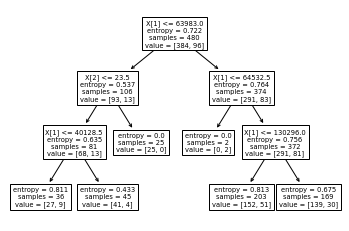

In [14]:
#PLot the decision tree
tree.plot_tree(model);

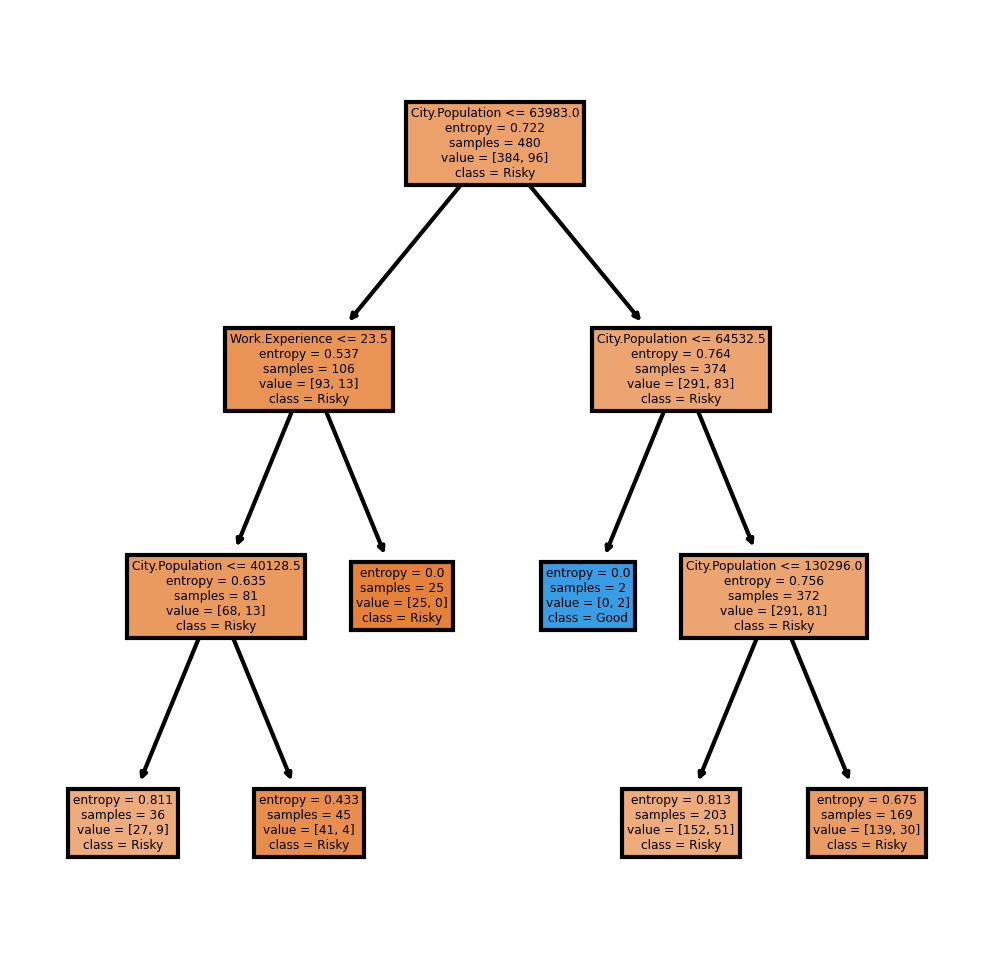

In [15]:
fn=['Undergrad','City.Population','Work.Experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);

In [16]:
y_predict = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[92,  0],
       [28,  0]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc=accuracy_score(y_test, y_predict)
print("Accuracy Score is ",acc*100)

Accuracy Score is  76.66666666666667


In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

0.7666666666666667